In [3]:
import numpy as np
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.ioff();
# plot.ion()

In [4]:
rng = np.random.default_rng(42)

###### Matplotlib

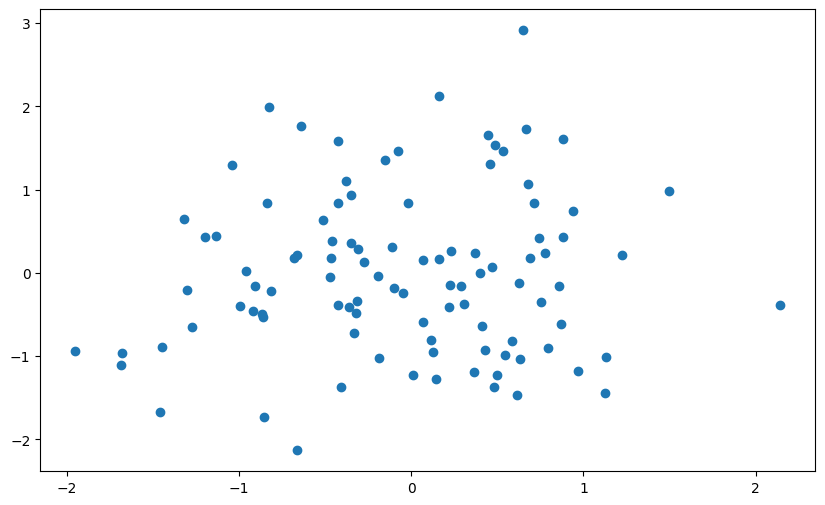

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
x = rng.standard_normal(100)
y = rng.standard_normal(100)

ax.plot(x, y, 'o');

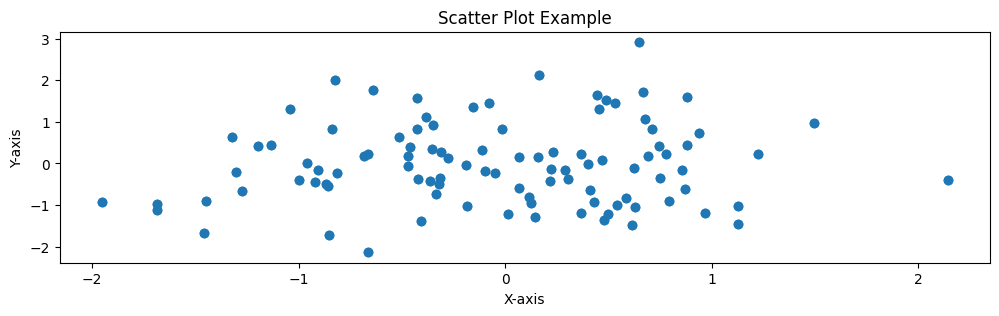

In [6]:
ax.scatter(x, y, marker='o');
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot Example')

fig.set_size_inches(12,3)
fig

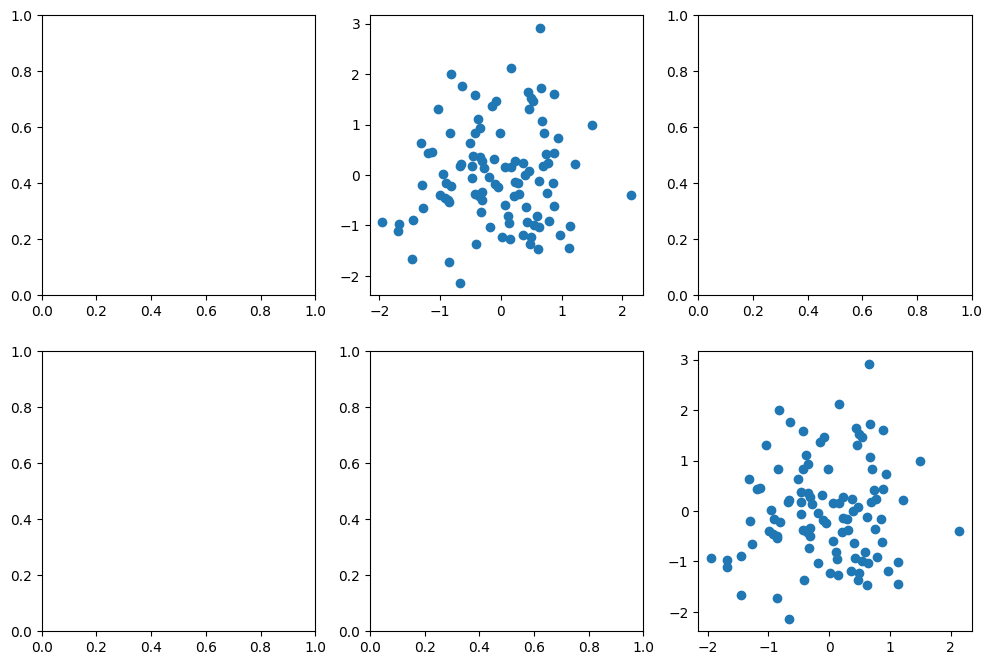

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes[0, 1].plot(x, y, 'o')
axes[1, 2].scatter(x, y, marker='o')

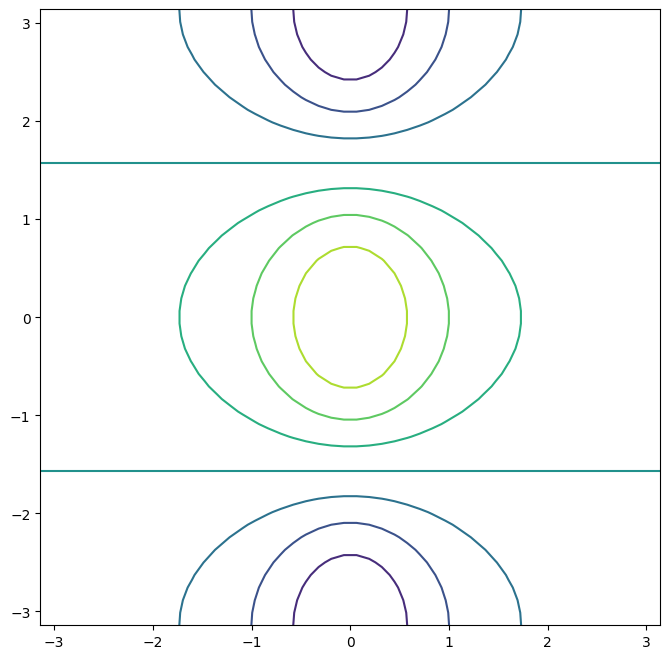

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))
ax.contour(x, y, f);

In [9]:
x = np.array([[1, 2], [3, 4]])
x.sum(axis=0)

array([4, 6])

In [10]:
x = np.random.normal(size=40)

df = pd.DataFrame(x) 
df.columns = ['value']

alt.Chart(df).mark_bar().encode(
    alt.X('value', bin=alt.Bin()),
    y='count()'
)

alt.Chart(...)

###### Auto Dataset

In [11]:
df_auto = pd.read_csv('Data/Auto.data', na_values=['?'], delim_whitespace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_26504\4044913757.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_auto = pd.read_csv('Data/Auto.data', na_values=['?'], delim_whitespace=True)


In [12]:
df_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [13]:
df_auto.shape

(397, 9)

In [14]:
# NA values
df_auto[df_auto.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i


In [15]:
df_auto_2 = df_auto.dropna().copy()
df_auto_2.shape

(392, 9)

In [16]:
# Adapt year format
df_auto_2['year'] = df_auto_2['year'].apply(lambda value: 1900 + value )

In [17]:
df_auto_2[df_auto_2['year'] < 1974]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,ford torino
...,...,...,...,...,...,...,...,...,...
120,19.0,4,121.0,112.0,2868.0,15.5,1973,2,volvo 144ea
121,15.0,8,318.0,150.0,3399.0,11.0,1973,1,dodge dart custom
122,24.0,4,121.0,110.0,2660.0,14.0,1973,2,saab 99le
123,20.0,6,156.0,122.0,2807.0,13.5,1973,3,toyota mark ii


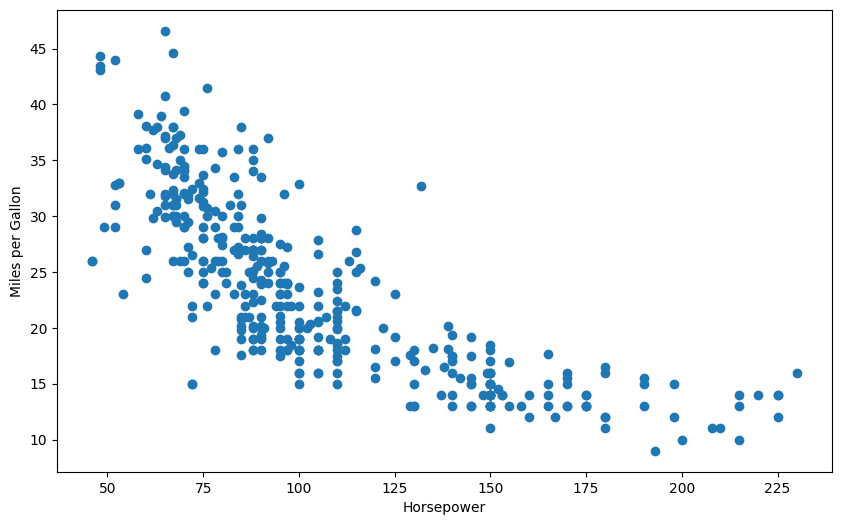

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per Gallon')
ax.scatter(df_auto_2['horsepower'], df_auto_2['mpg'], marker='o');
plt.show()

In [19]:
df_auto['cylinders'] = df_auto['cylinders'].astype('category')

array([<Axes: title={'center': 'mpg'}>], dtype=object)

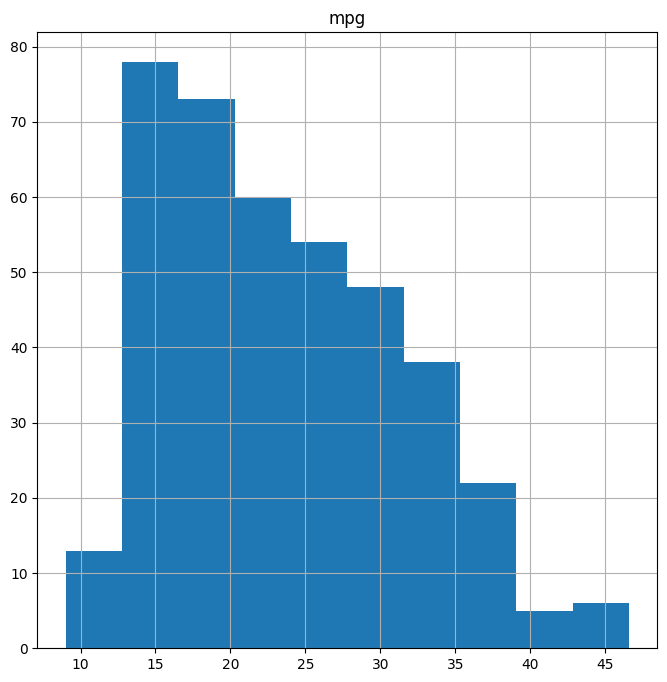

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
df_auto.hist('mpg', ax=ax)

###### College Dataset

In [21]:
df_college = pd.read_csv('Data/College.csv', index_col=0)

In [22]:
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [23]:
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [24]:
df_college.loc['University of Georgia']

Private           No
Apps           11220
Accept          7871
Enroll          3320
Top10perc         43
Top25perc         79
F.Undergrad    19553
P.Undergrad     2748
Outstate        5697
Room.Board      3600
Books            525
Personal        1755
PhD               88
Terminal          95
S.F.Ratio       14.7
perc.alumni       22
Expend          7881
Grad.Rate         63
Name: University of Georgia, dtype: object

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

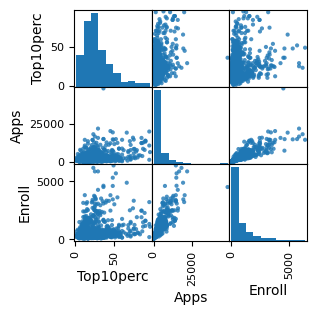

In [25]:
pd.plotting.scatter_matrix(df_college[['Top10perc', 'Apps', 'Enroll']], alpha=0.8, figsize=(3,3))

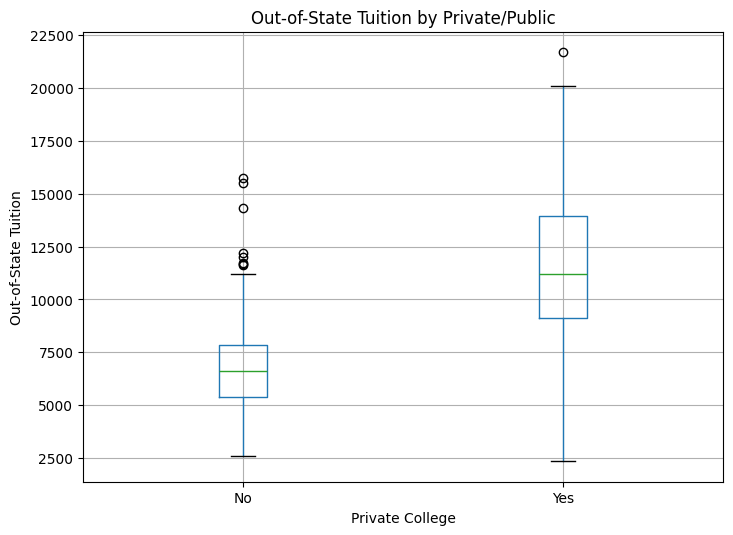

In [26]:
df_college.boxplot(column='Outstate', by='Private', figsize=(8, 6))
plt.title('Out-of-State Tuition by Private/Public')
plt.suptitle('') 
plt.xlabel('Private College')
plt.ylabel('Out-of-State Tuition')
plt.show()

In [27]:
df_college['Outstate'].idxmax()

'Bennington College'

In [28]:
df_college['Elite'] = df_college['Top10perc'].apply(lambda x: 1 if x > 50 else 0)
df_college['Elite']. value_counts()

Elite
0    699
1     78
Name: count, dtype: int64

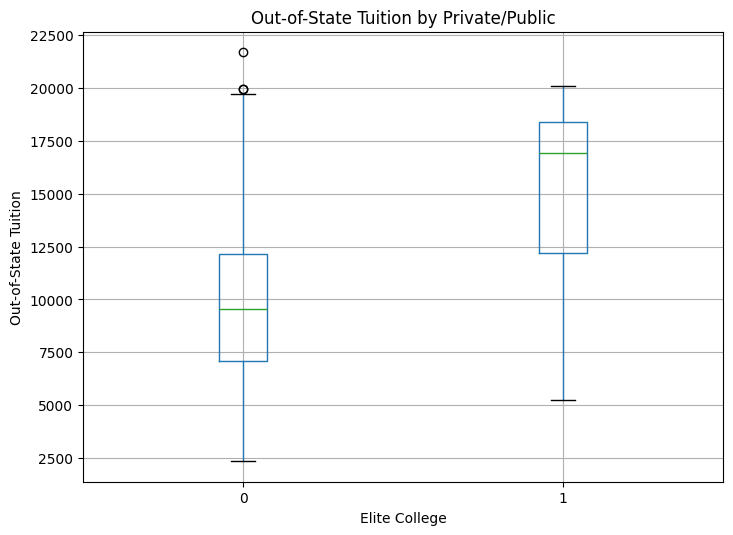

In [29]:
df_college.boxplot(column='Outstate', by='Elite', figsize=(8, 6))
plt.title('Out-of-State Tuition by Private/Public')
plt.suptitle('') 
plt.xlabel('Elite College')
plt.ylabel('Out-of-State Tuition')
plt.show()

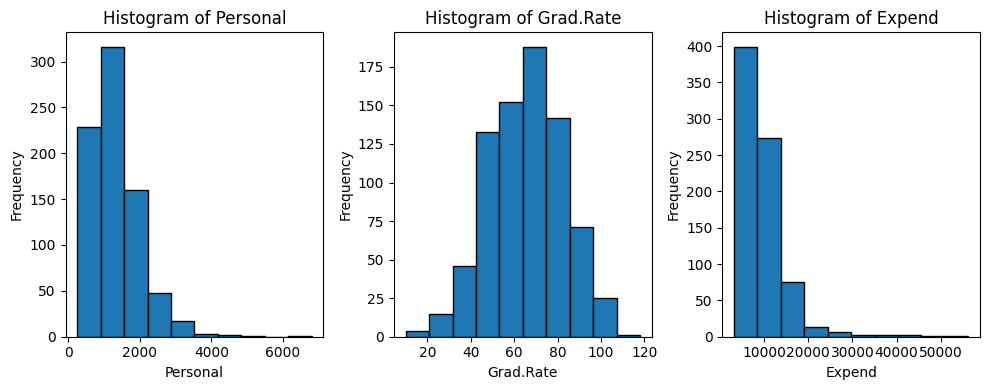

In [30]:
vars = ['Personal', 'Grad.Rate', 'Expend']

fig, axes = plt.subplots(ncols=3, figsize=(10, 4))

for ax, var in zip(axes.flatten(), vars):
    df_college[var].plot.hist( ax=ax, edgecolor='black')
    ax.set_title(f"Histogram of {var}")
    ax.set_xlabel(var)

plt.tight_layout()
plt.show()

In [31]:
df_college[df_college['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,0


###### Auto Dataset

In [32]:
df_auto_2

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,1982,1,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,1982,2,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,1982,1,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,1982,1,ford ranger


In [33]:
df_auto_2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,3.000000


In [34]:
df_auto_2.drop(df_auto_2.index[10:87]).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,24.443810,5.365079,186.996825,100.707937,2933.196825,15.726032,1977.149206,1.603175
std,7.849357,1.650146,99.852423,35.924777,810.991470,2.713851,3.119686,0.820511
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,1970.000000,1.000000
25%,18.000000,4.000000,99.500000,75.000000,2212.500000,14.000000,1975.000000,1.000000
50%,24.000000,4.000000,145.000000,90.000000,2790.000000,15.500000,1977.000000,1.000000
75%,30.600000,6.000000,250.000000,115.000000,3484.500000,17.300000,1980.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,1982.000000,3.000000


Text(0, 0.5, 'Miles per Gallon')

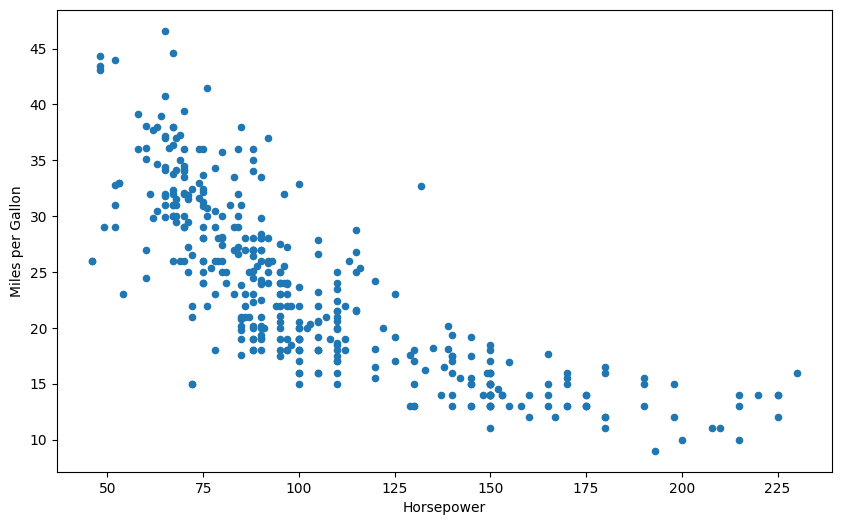

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
df_auto_2.plot.scatter(x='horsepower', y='mpg', ax=ax, marker='o')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per Gallon')

Text(0, 0.5, 'Miles per Gallon')

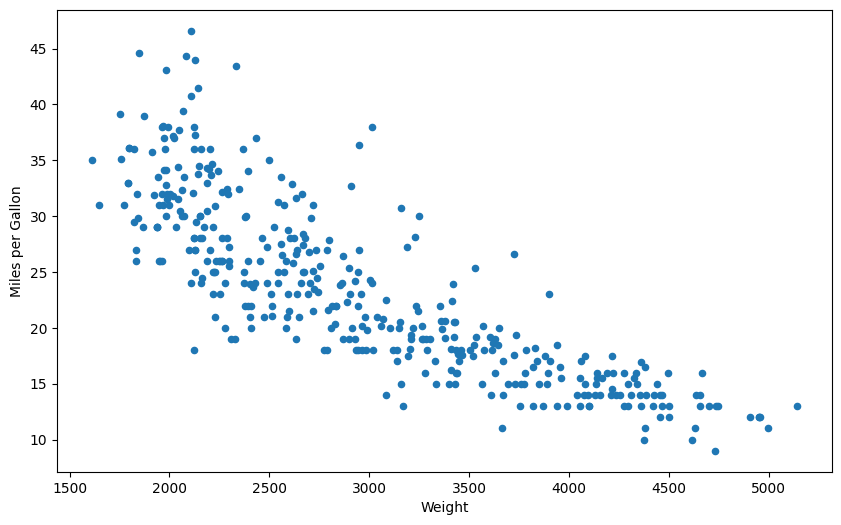

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
df_auto_2.plot.scatter(x='weight', y='mpg', ax=ax, marker='o')
ax.set_xlabel('Weight')
ax.set_ylabel('Miles per Gallon')

Text(0, 0.5, 'MPG')

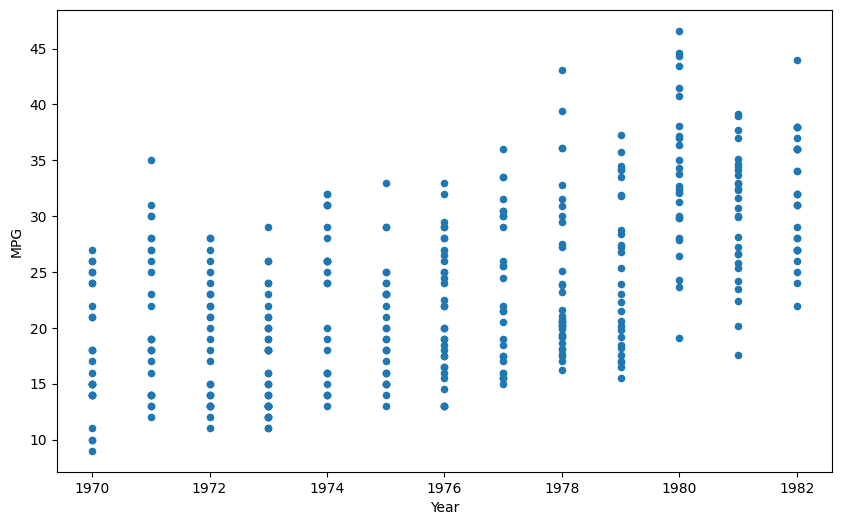

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
df_auto_2.plot.scatter(x='year', y='mpg', ax=ax, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('MPG')

Text(0.5, 1.0, 'Weight vs. Miles per Gallon')

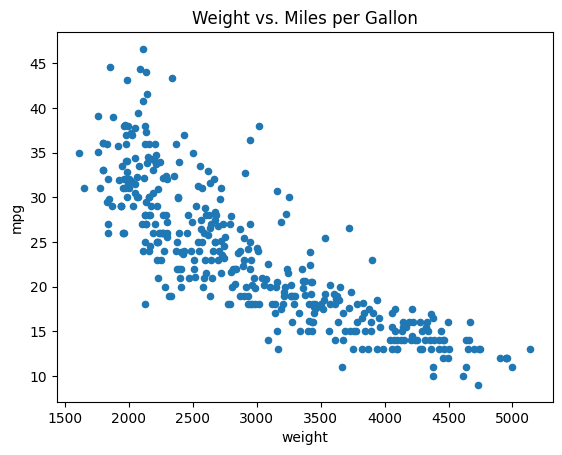

In [38]:
df_auto_2.plot.scatter(x='weight', y='mpg', marker='o')
plt.title('Weight vs. Miles per Gallon')

###### Boston Dataset

In [39]:
df_boston = pd.read_csv('Data/Boston.csv', index_col=0)  

In [40]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [41]:
df_boston.shape

(506, 13)

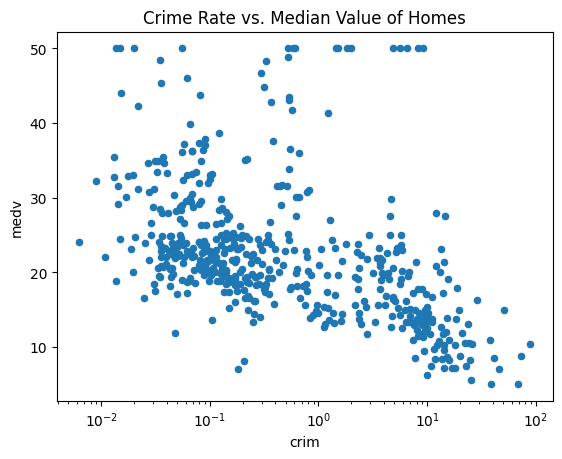

In [42]:
df_boston.plot.scatter(x='crim', y='medv', marker='o')
plt.title('Crime Rate vs. Median Value of Homes')
plt.xscale('log')

Text(0.5, 1.0, 'Industry Proportion vs. Median Value of Homes')

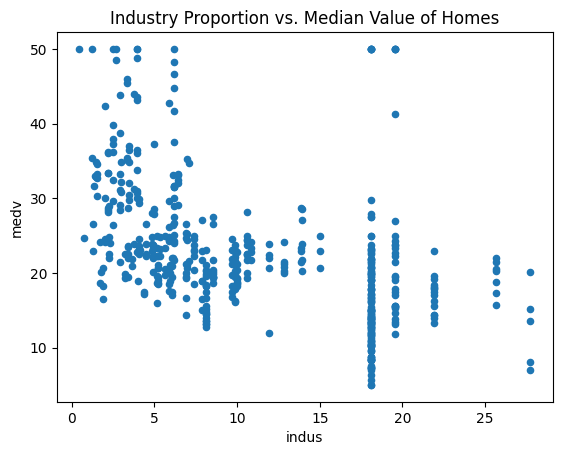

In [43]:
df_boston.plot.scatter(x='indus', y='medv', marker='o')
plt.title('Industry Proportion vs. Median Value of Homes')

Text(0.5, 1.0, 'Age of Homes vs. Median Value of Homes')

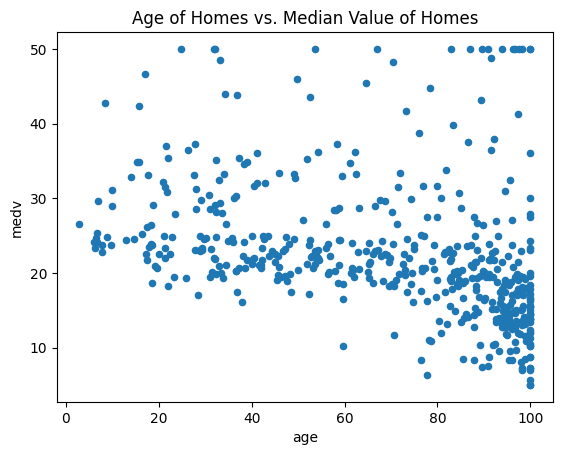

In [44]:
df_boston.plot.scatter(x='age', y='medv', marker='o')
plt.title('Age of Homes vs. Median Value of Homes')

Text(0.5, 1.0, 'Distance to Employment Centers vs. Median Value of Homes')

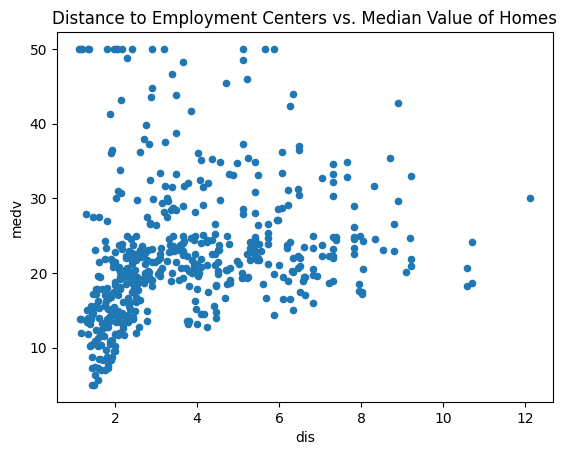

In [45]:
df_boston.plot.scatter(x='dis', y='medv', marker='o')
plt.title('Distance to Employment Centers vs. Median Value of Homes')

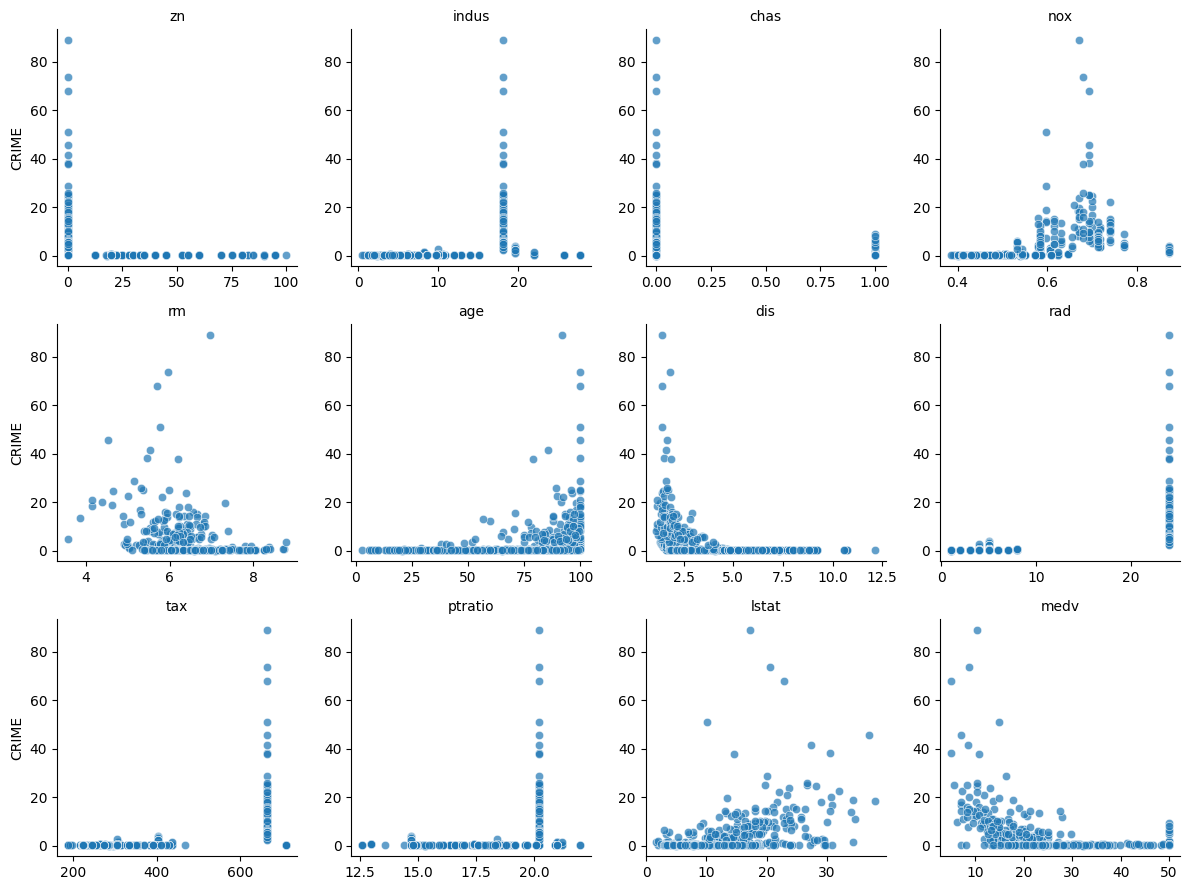

In [48]:
other_vars = [col for col in df_boston.columns if col != 'crim']

# Melt für einfache Visualisierung
df_melted = df_boston.melt(id_vars='crim', value_vars=other_vars, var_name='Variable', value_name='Value')

# Plot: Scatterplots von CRIME gegen jede andere Variable
g = sns.FacetGrid(df_melted, col='Variable', col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.scatterplot, 'Value', 'crim', alpha=0.7)
g.set_titles('{col_name}')
g.set_axis_labels("", "CRIME")
plt.tight_layout()
plt.show()

In [ ]:
# ...